In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Customer Churn Analysis
__Problem Statement:__


   Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

   Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

   Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

   You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [2]:
#Lets load the dataset with given URL
df = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv",sep=',')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#lets check for the shape of the data
df.shape

(7043, 21)

This data set is having 7043 samples with 21 different columns.

In [4]:
# check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Great there is no any null value present in the dataset.

In [5]:
#lets check the data types 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In column total charges there is numeric data is present but its showing object data type, we need to convert it into float

In [6]:
#lets convert TotalCharges to numeric data
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [7]:
#Lets chcek the datatypes again
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Now we have converted TotalCharges column to float type.

In [8]:
# Again check for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Here we can observe after converting data type of TotalCharges column we got some null values in it.

In [9]:
#Lets replace null values from column TotalCharges with the mean value of that column
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [10]:
#Lets again chcek null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
#As the column customerID is not required for model building we will drop this column
df.drop(columns = 'customerID', inplace = True)

In [12]:
#Lets check the values in categorical data 
for col in df.columns:
    if df[col].dtypes == 'object':
        print(df[col].value_counts())
        print('----------------------------------------')

Male      3555
Female    3488
Name: gender, dtype: int64
----------------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
----------------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
----------------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
----------------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
----------------------------------------
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
----------------------------------------
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
----------------------------------------
No        

## EDA

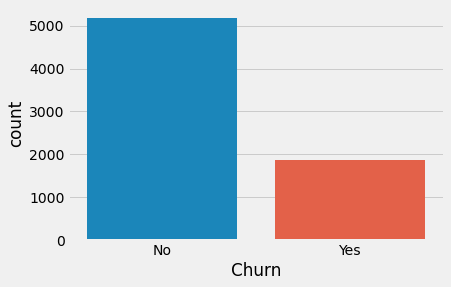

In [13]:
#have a look on our target variable
plt.style.use('fivethirtyeight')
sns.countplot(df['Churn'])
plt.show()

* This shows dataset is imbalanced, we can see there are more number of customers who have not churned, compared to churned numbers.

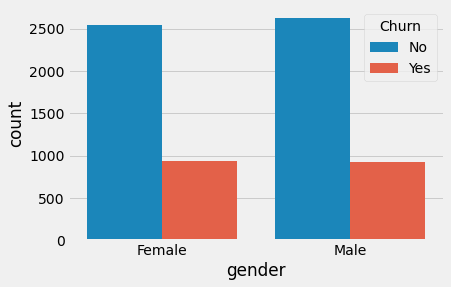

In [14]:
#lets check relation between gender and churn
sns.countplot(x = 'gender', hue = 'Churn', data = df)
plt.show()

* We can say both type of genders equally churned.

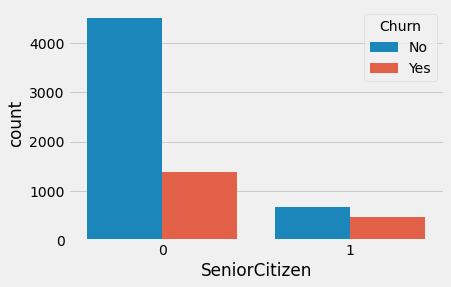

In [15]:
#check the relation between column SeniorCitizen and Churn
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = df)
plt.show()

* looking at this plot we can say there is more number of customers who are not SeniorCitizens, but the ratio of getting churned is high in case of SeniorCitizens compared to others

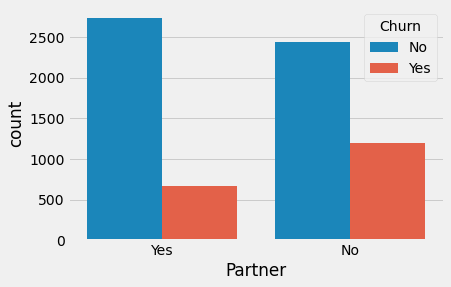

In [16]:
#lets check the relation between Partner and Churn
sns.countplot(x = 'Partner', hue = 'Churn', data = df)
plt.show()

* This plot will tell us that customer without partner has more churn rate compared to that of who is with partner

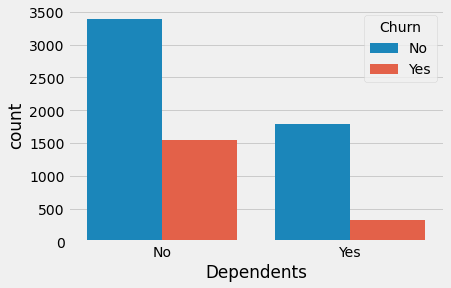

In [17]:
#check the relation between Partner and Churn
sns.countplot(x = 'Dependents', hue = 'Churn', data = df)
plt.show()

* here we can say that the churn rate is more in case of customers who are having dependents.

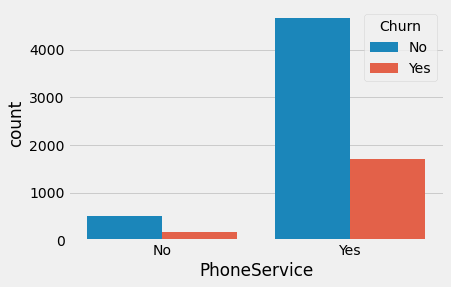

In [18]:
#check the relation between PhoneService and Churn
sns.countplot(x = 'PhoneService', hue = 'Churn', data = df)
plt.show()

* We can say there are more number of customers using phone service, and also more number of people churned from this category.

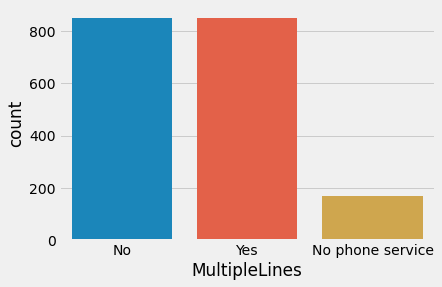

In [19]:
#lets chcek the count of customers churn on the basis "MultipleLines"
sns.countplot(x = "MultipleLines", data = df.loc[df["Churn"] == "Yes"])
plt.show()

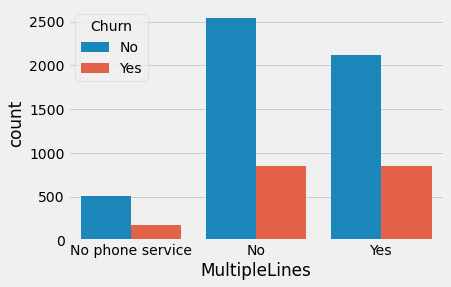

In [20]:
#check the relation between PhoneService and Churn
sns.countplot(x = 'MultipleLines', hue = 'Churn', data = df)
plt.show()

We can say there are very less number of customers with no phone service.

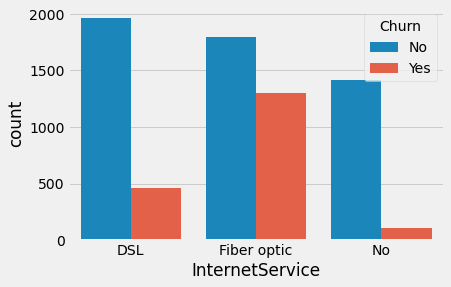

In [21]:
#check the relation between InternetService and Churn
sns.countplot(x = 'InternetService', hue = 'Churn', data = df)
plt.show()

* By seeing oabove plot we can say that the churn ratio is higher in case of fiber optic compared to others.

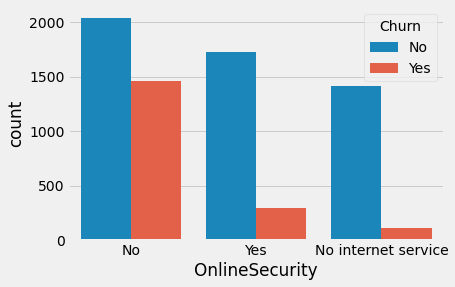

In [22]:
#check churn based on online security
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = df)
plt.show()

* This plot will tell us if there is no any online security, the ratio of churn is higher.

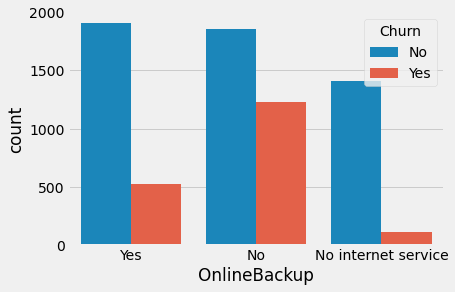

In [23]:
#check churn based on OnlineBackup
sns.countplot(x = 'OnlineBackup', hue = 'Churn', data = df)
plt.show()

* Customer churn ratio is higher in case of unavailability of online backup.

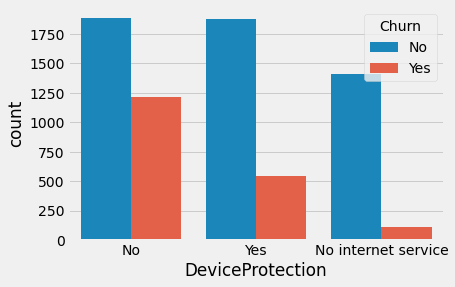

In [24]:
#check churn based on DeviceProtection
sns.countplot(x = 'DeviceProtection', hue = 'Churn', data = df)
plt.show()

* Customer churn ratio is more in case if there is no any device protection available.

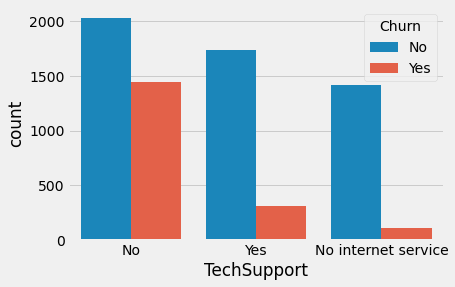

In [25]:
#check churn based on TechSupport
sns.countplot(x = 'TechSupport', hue = 'Churn', data = df)
plt.show()

* This will tell us that if tech support is not available then the churn rate is high.

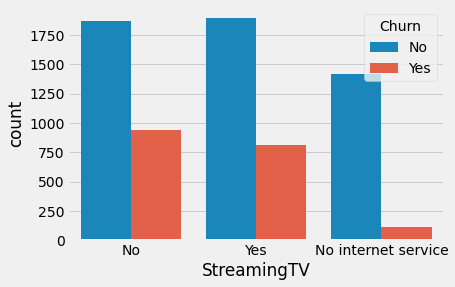

In [26]:
#check churn based on StreamingTV
sns.countplot(x = 'StreamingTV', hue = 'Churn', data = df)
plt.show()

chances of getting churn is nearly same if there is streamingTV available or not available.

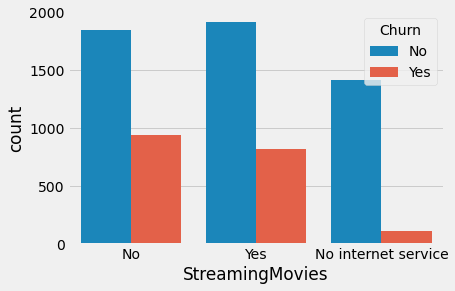

In [27]:
#check churn based on StreamingMovies
sns.countplot(x = 'StreamingMovies', hue = 'Churn', data = df)
plt.show()

This plot almost looking same as previous plot, in case if there is no internet service then ratio of getting churn is low.

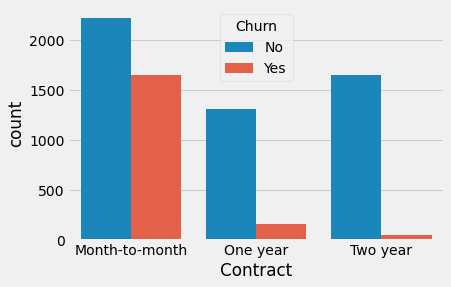

In [28]:
#check churn based on Contract
sns.countplot(x = 'Contract', hue = 'Churn', data = df)
plt.show()

This will tell us that ratio of getting churned is high in case of month-to-month contract.

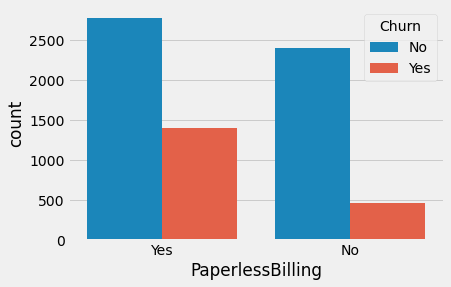

In [29]:
#check churn based on PaperlessBilling
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = df)
plt.show()

* We can see here if billing is paperless the ratio of getting churned becomes higher.

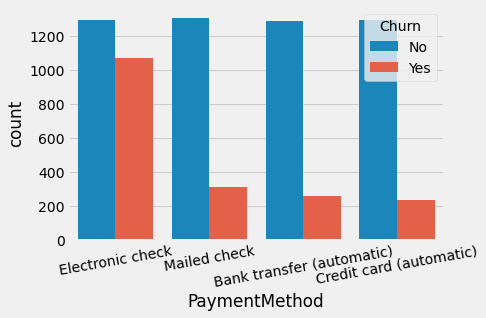

In [30]:
#check churn based on PaymentMethod
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = df)
plt.xticks(rotation = 10)
plt.show()

* Above plot represents churn based on PaymentMethod, looking at this plot we can say that if payment is through electronic check then ratio of churn is higher compared to other methods.

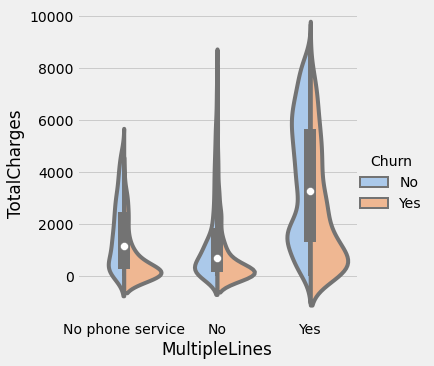

In [31]:
#lets check the relation between MultipleLines, TotalCharges, churn using Violin plot
sns.catplot(x="MultipleLines", y="TotalCharges", hue="Churn",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

Looking at this plot we can say ratio of getting churn is higher when customers using multilines and where the total charges in the range of 0 to 8000.

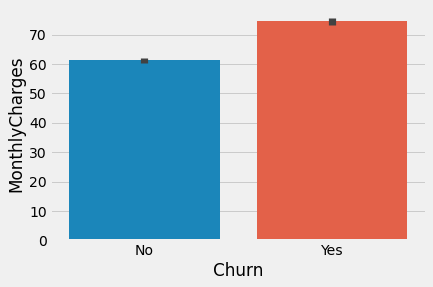

In [32]:
#lets plot barplot for MonthlyCharges vs churn
sns.barplot(x = 'Churn', y = 'MonthlyCharges', data = df)
plt.show()

We can see that if monthly charges for customers goes above 60, the chances of getting churn is high

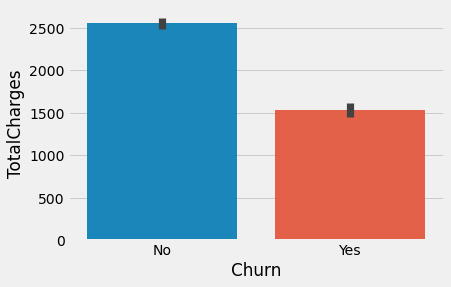

In [33]:
#lets plot barplot for MonthlyCharges vs churn
sns.barplot(x = 'Churn', y = 'TotalCharges', data = df)
plt.show()

* In Total charges we can see its opposite of monthly charges, here if total charges goes above 1500, the tendency of getting churned is low.

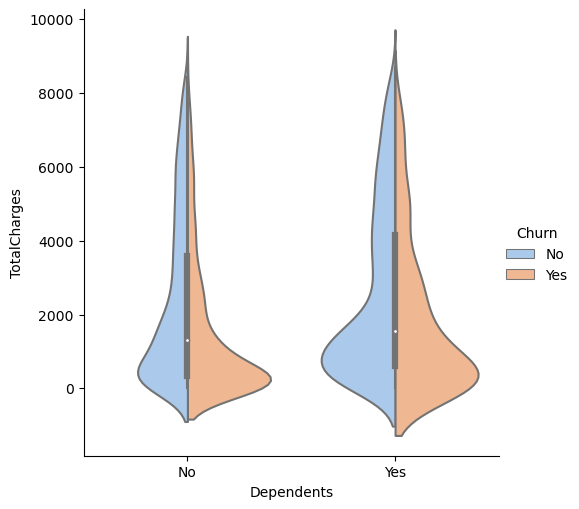

In [34]:
#lets check the relation between Dependents, TotalCharges, churn using Violin plot
plt.style.use('default')
sns.catplot(x="Dependents", y="TotalCharges", hue="Churn",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

Looking at the above violin plot we can say if there are dependents and the total charges are in range 0 to 2000, the chances of getting churned are high.

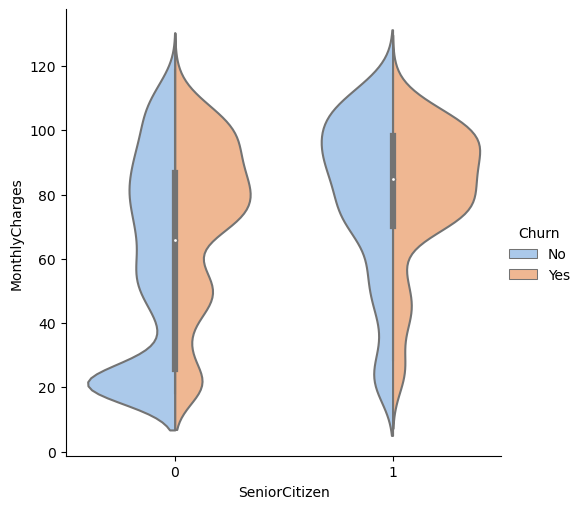

In [35]:
#lets check the relation between SeniorCitizen, MonthlyCharges, churn using Violin plot
plt.style.use('default')
sns.catplot(x="SeniorCitizen", y="MonthlyCharges", hue="Churn",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

* looking at above plot we can say if a customer is a senior citizen and montholy charges is between 70 to 110, the churn rate is high
* when customer is not a senior citizen and having monthly charges arroung 20 then the ratio of churn is high.

## Apply label encoder to target variable

In [36]:
from sklearn.preprocessing import LabelEncoder
leb_enc = LabelEncoder()
df2 = leb_enc.fit_transform(df["Churn"])
pd.Series(df2)
df["Churn"] = df2

## Heat map for checking correlation

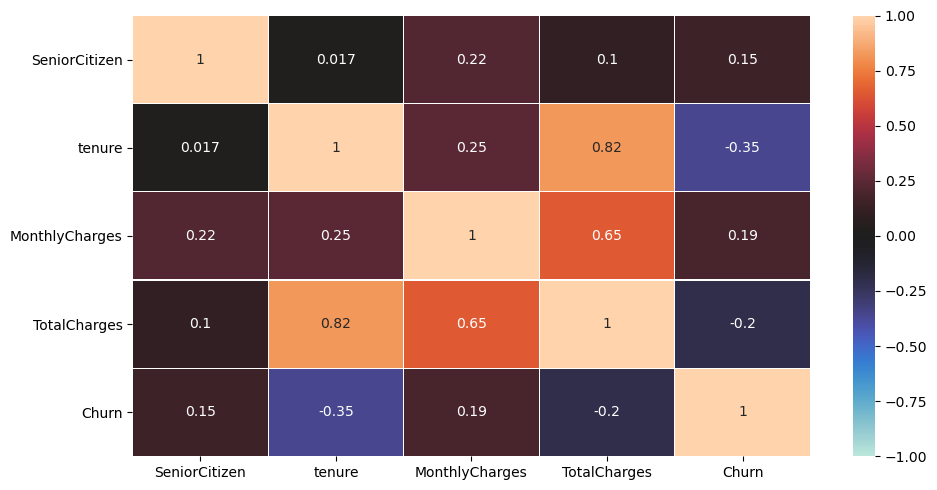

In [37]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (10,5))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()


* correlation considers only numerical data,
* we can see there is good relation between features and target variable.
* tenure and TotalCharges are negatively related to Churn. and are strongly related to each other.
* TotalCharges and monthlyCharges are also in good relation with each other.

In [38]:
#lets describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.300441,2265.000258,18.80,402.225,1400.55,3786.60,8684.80
Churn,7043.0,0.265370,0.441561,0.00,0.000,0.00,1.00,1.00


##### The data looks good, looking at the data description it ensures once again that there are no null values present.

## Checking for outliers using box plots

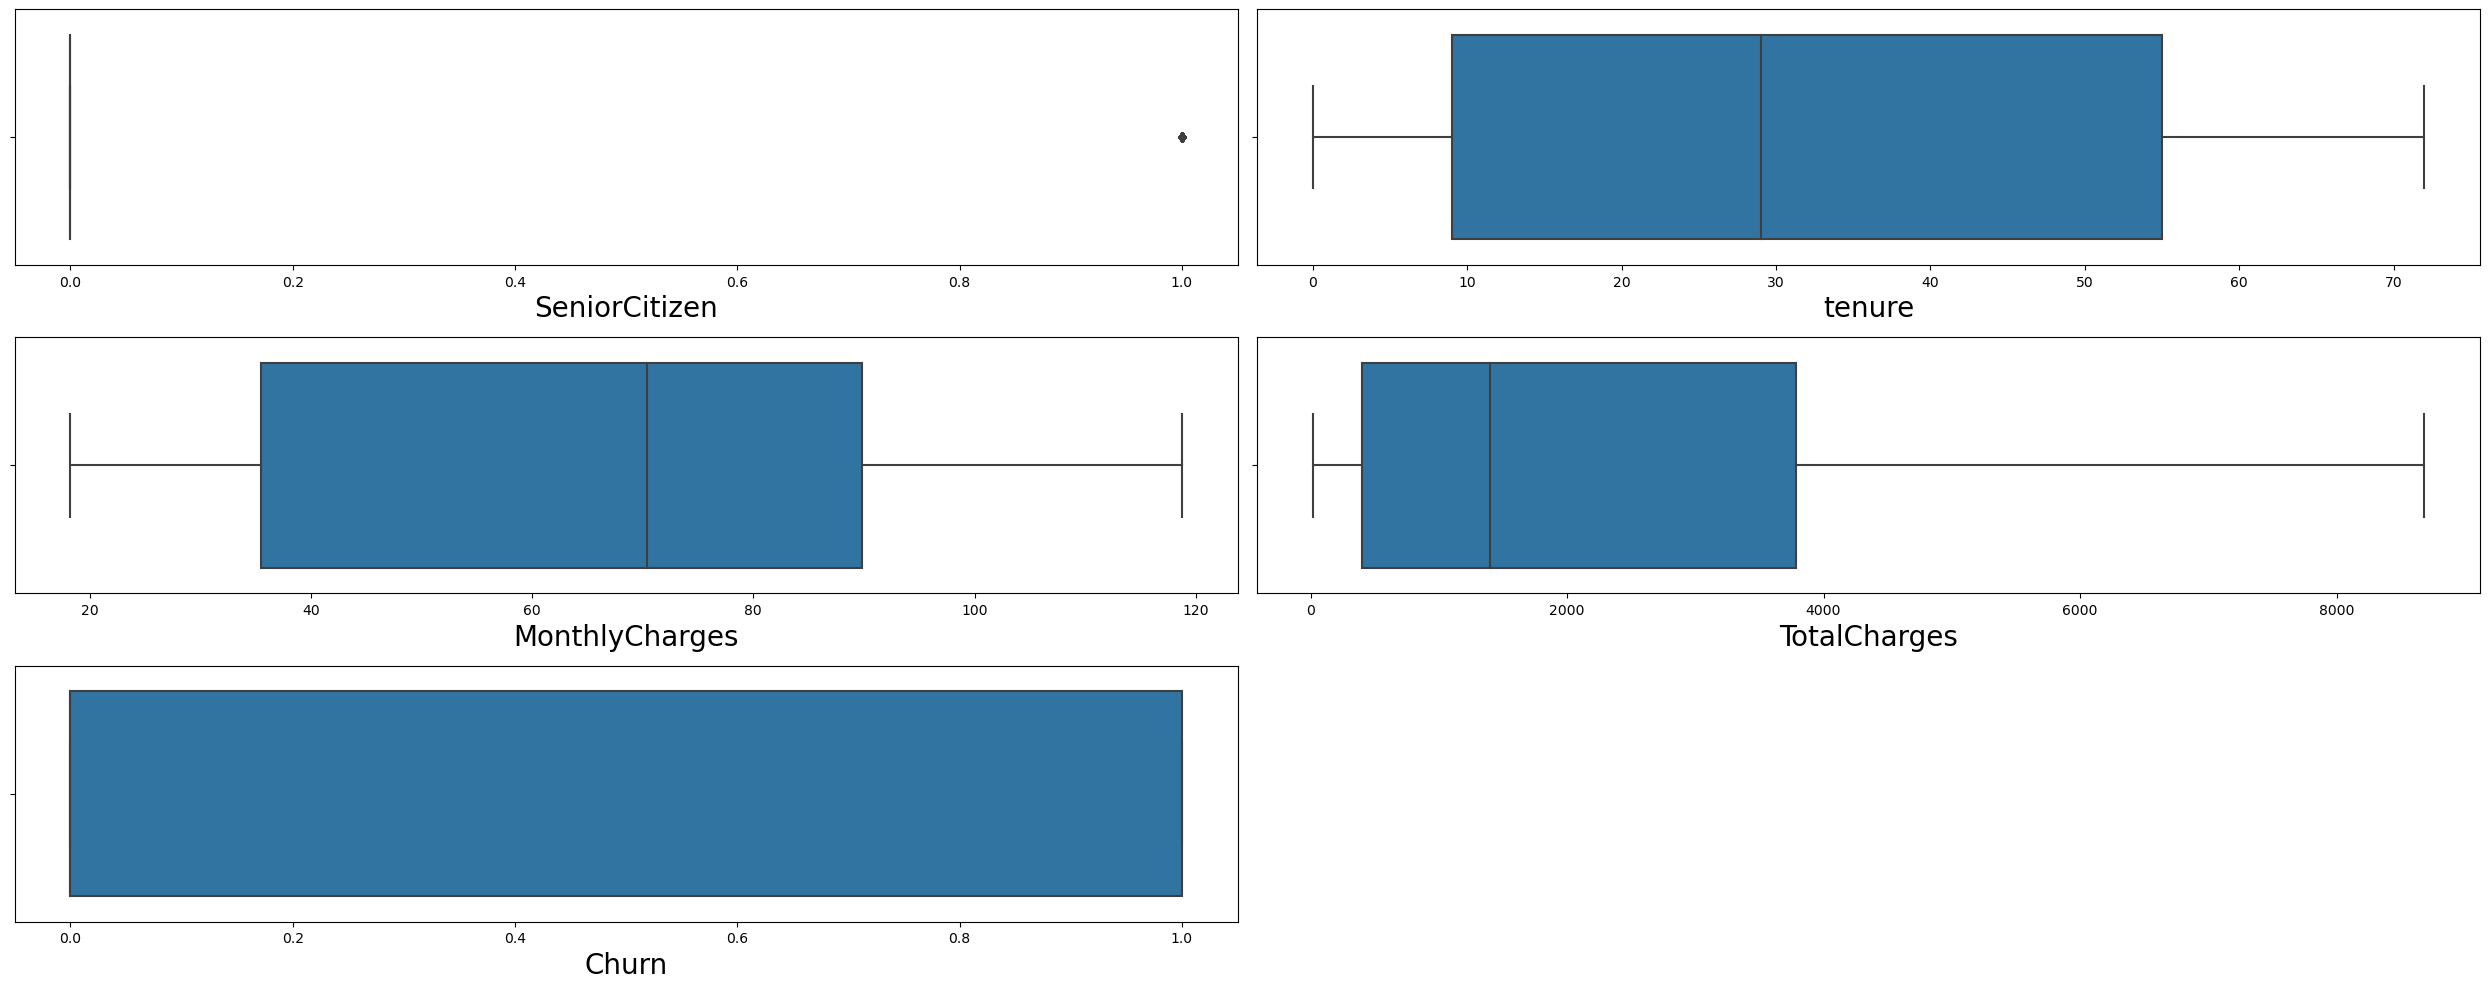

In [39]:
#lets check outliers from continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (25,10))
plotnumber = 1
for column in num_data:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()


###### By looking at the boxplots we can conclude that there are no any outliers present in our dataset. So we are not going to remove outliers.

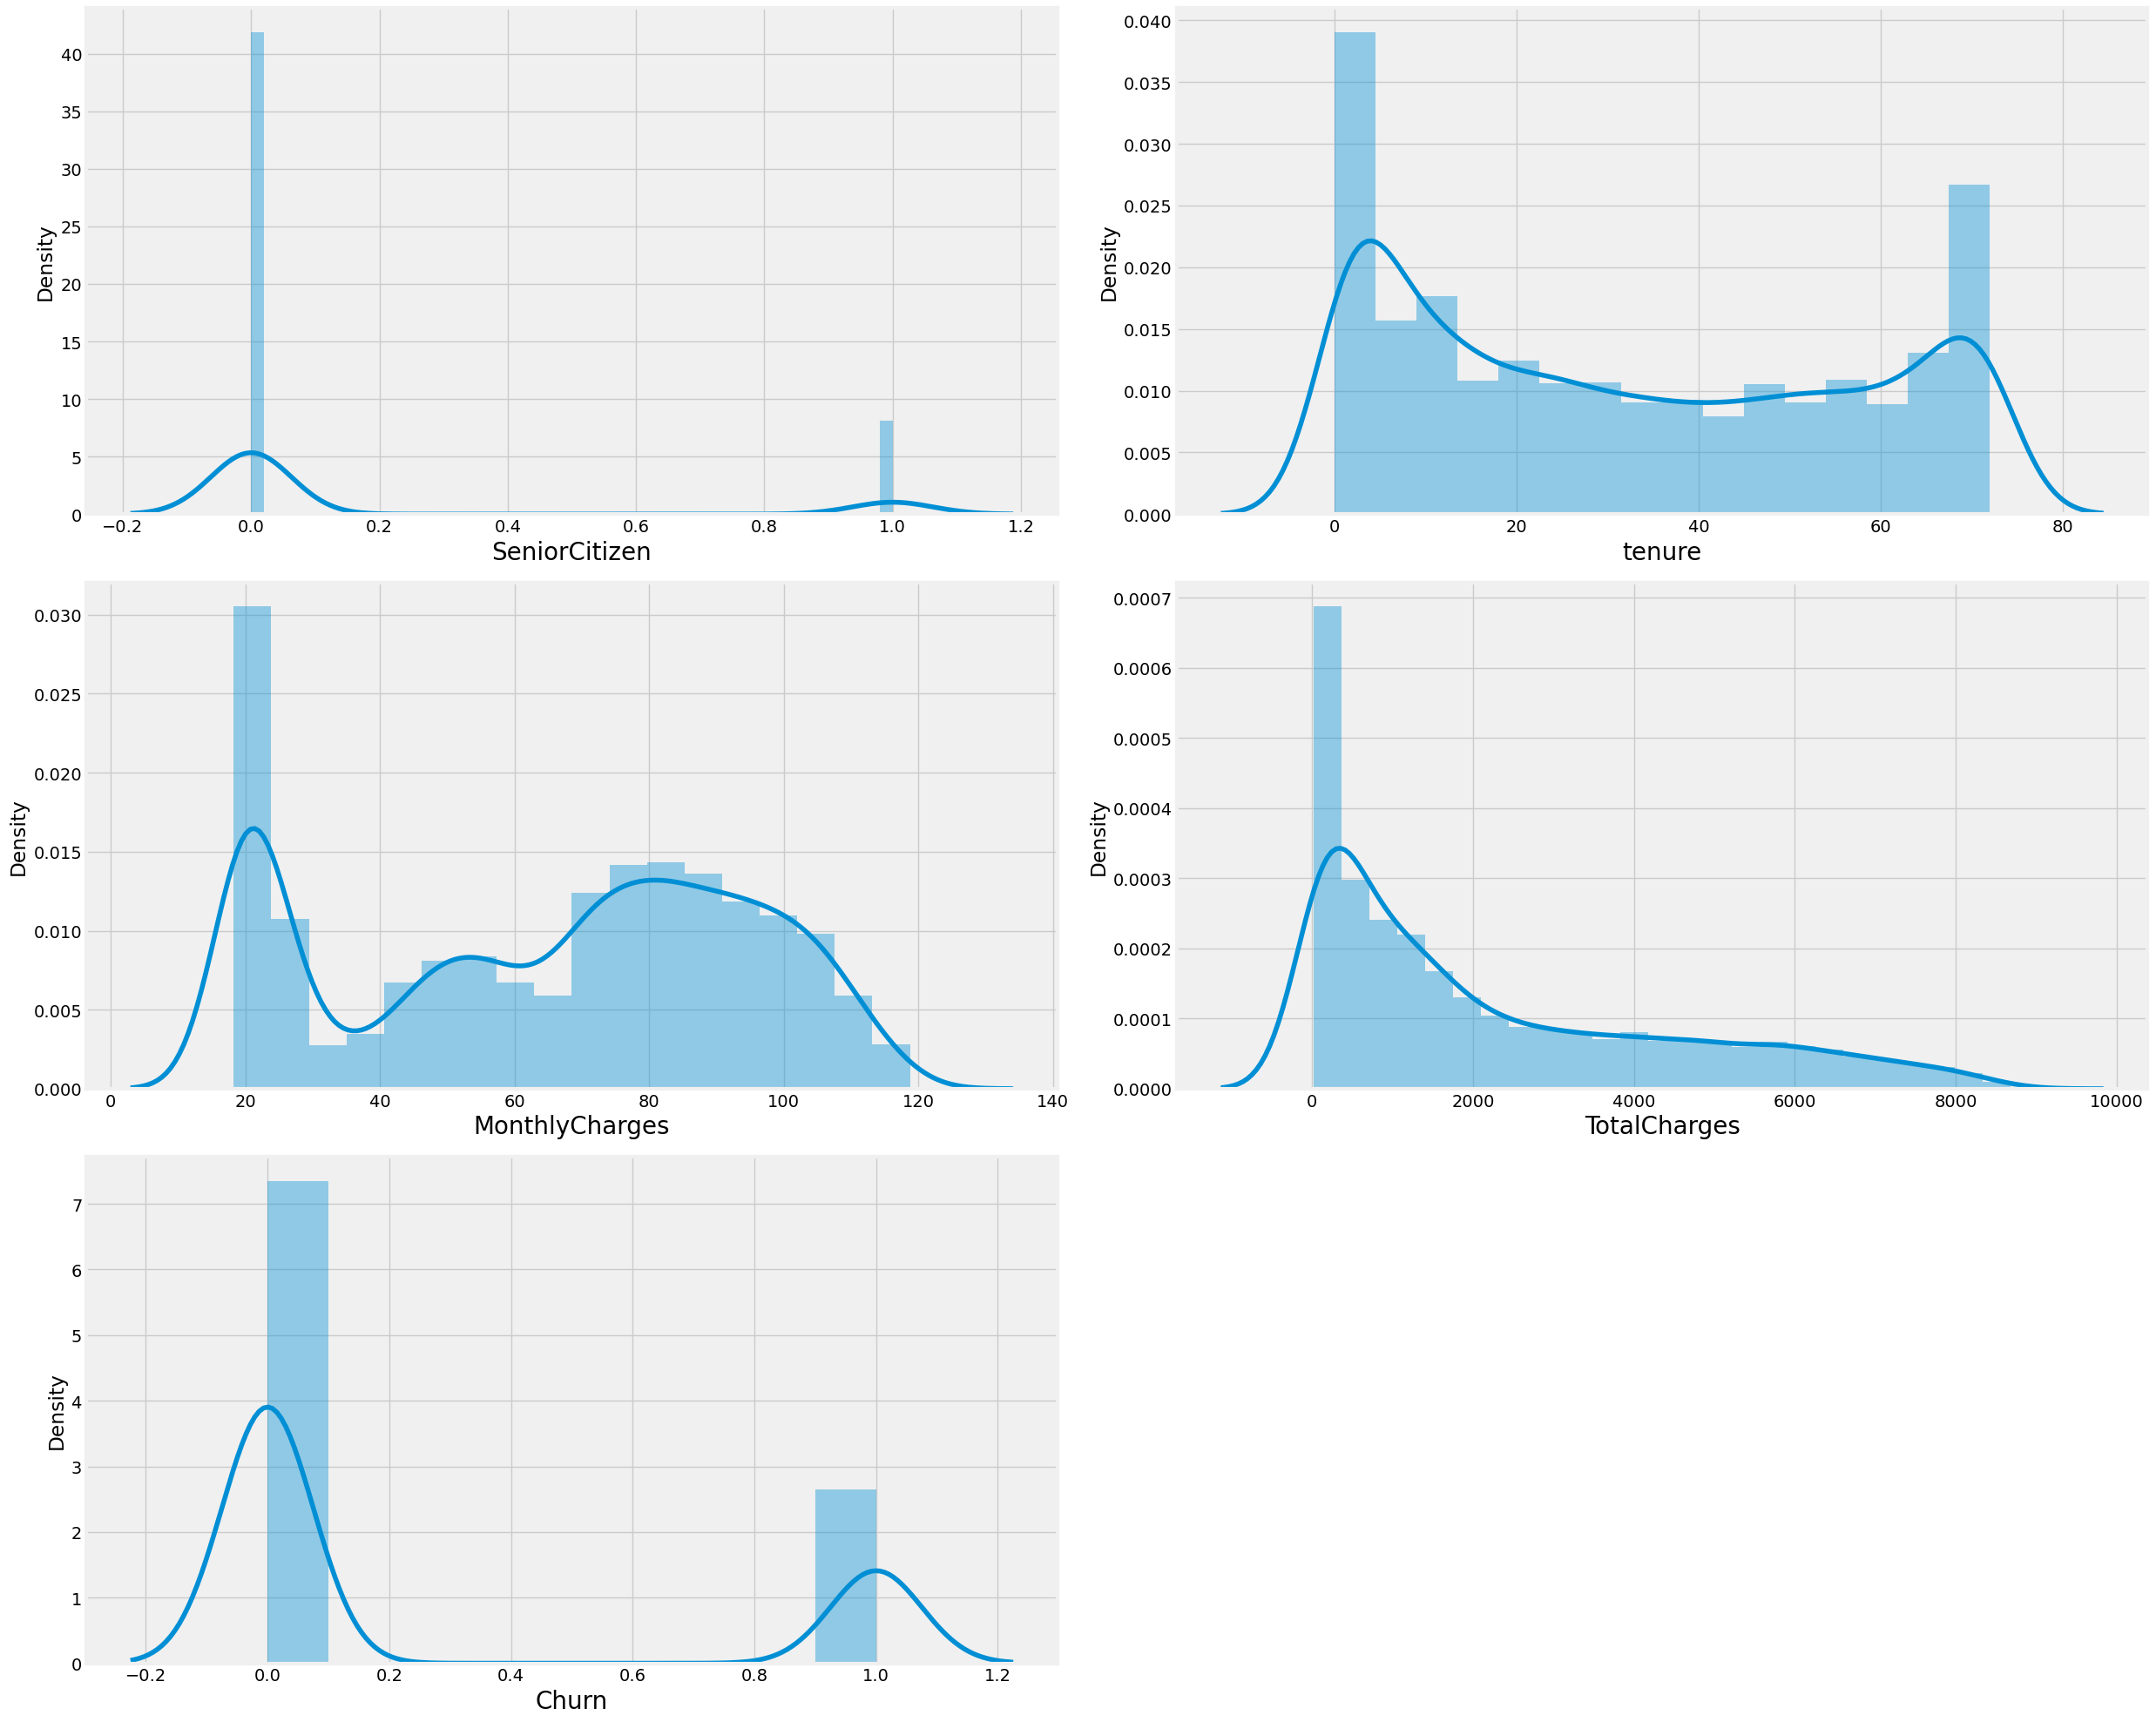

In [40]:
#lets see the destribution of numerical data
num_data = df._get_numeric_data()
plt.figure(figsize = (25,20))
plt.style.use('fivethirtyeight')
plotnumber = 1
for column in num_data:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

##### By looking at distribution plots we observe some skewness in columns tenure, MonthlyCharges and TotalCharges

In [41]:
#lets check for skewness
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
Churn             1.063031
dtype: float64

## Separate features and label as x & y respectively

In [42]:
x = df.drop(columns = 'Churn')
y = df['Churn']

In [43]:
x.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

In [44]:
#Lets treat the skewness from numerical columns
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.cbrt(x[index])

In [45]:
#check the skewness again
x.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -1.064192
dtype: float64

In [46]:
#lets separate numerical and categorical features for scaling and encoding
num = x._get_numeric_data()
cat = x.select_dtypes(include=['object'])

## Applying StandardScaler to numerical features

In [47]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
x_num = scaler.fit_transform(num)
x_num = pd.DataFrame(x_num,columns=num.columns)

In [48]:
#combine both numerical and categorical features
X = pd.concat([x_num,cat], axis = 1)

In [49]:
#lets have a look at our features
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.439916,-1.277445,-1.160323,-2.501411,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,-0.439916,0.066327,-0.259629,0.423645,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,-0.439916,-1.236724,-0.362660,-1.428854,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,-0.439916,0.514251,-0.746535,0.409021,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,-0.439916,-1.236724,0.197365,-1.177372,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


## Encoding

In [50]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in X.columns:
    if X[i].dtypes == "object" :
        X[i] = enc.fit_transform(X[i].values.reshape(-1,1))

In [51]:
#lets have a look at data after encoding
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.439916,-1.277445,-1.160323,-2.501411,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,-0.439916,0.066327,-0.259629,0.423645,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0
2,-0.439916,-1.236724,-0.362660,-1.428854,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
3,-0.439916,0.514251,-0.746535,0.409021,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0
4,-0.439916,-1.236724,0.197365,-1.177372,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [52]:
#check the shape
X.shape

(7043, 19)

In [53]:
#check value count for target variable
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

##### We can see that this is a case of imbalance, so will do oversampling

## Over sampling

In [54]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

In [55]:
#lets check the count of target variable now
y_over.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

## Finding Best random state

In [56]:
#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(50,100):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.7982218786238887 on Random State 79


In [57]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 79)

## Model Building with Evaluation Metrics

## LogisticRegression model

In [58]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
accuracy = accuracy_score(y_test,predlr)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 79.82218786238887
roc_auc_score: 79.8733521978068
---------------------------------------------------
Confusion Matrix : 
 [[ 974  332]
 [ 190 1091]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      1306
           1       0.77      0.85      0.81      1281

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587


Cross validation score : 78.0250255088341

Accuracy Score - Cross Validation Score : 1.7971623535547678


## DecisionTreeClassifier model

In [59]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test,pred_dt)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

#cross validation score
scores = cross_val_score(dt, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 80.28604561267878
roc_auc_score: 80.27972140830826
---------------------------------------------------
Confusion Matrix : 
 [[1057  249]
 [ 261 1020]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.80      0.81      0.81      1306
           1       0.80      0.80      0.80      1281

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587


Cross validation score : 78.85698475073724


Accuracy Score - Cross Validation Score : 1.4290608619415366


## RandomForestClassifier model

In [60]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
accuracy = accuracy_score(y_test,pred_rf)*100

print(f"Accuracy Score:", accuracy)
print(f"\nroc_auc_score: {roc_auc_score(y_test,pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

#cross validation score
scores = cross_val_score(rf, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 86.27754155392347

roc_auc_score: 86.28111651860804
---------------------------------------------------
Confusion Matrix : 
 [[1122  184]
 [ 171 1110]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1306
           1       0.86      0.87      0.86      1281

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587


Cross validation score : 85.48625091353146


Accuracy Score - Cross Validation Score : 0.7912906403920061


## KNeighborsClassifier model

In [61]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
accuracy = accuracy_score(y_test,pred_kn)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

#cross validation score
scores = cross_val_score(kn, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 79.08774642442984
roc_auc_score: 79.20272494808684
---------------------------------------------------
Confusion Matrix : 
 [[ 879  427]
 [ 114 1167]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.67      0.76      1306
           1       0.73      0.91      0.81      1281

    accuracy                           0.79      2587
   macro avg       0.81      0.79      0.79      2587
weighted avg       0.81      0.79      0.79      2587


Cross validation score : 79.37787397585242


Accuracy Score - Cross Validation Score : -0.29012755142258584


## XGBClassifier model

In [62]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_xgb)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

#cross validation score
scores = cross_val_score(xgb, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 84.77000386548124
roc_auc_score: 84.7648456113799
---------------------------------------------------
Confusion Matrix : 
 [[1114  192]
 [ 202 1079]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1306
           1       0.85      0.84      0.85      1281

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587


Cross validation score : 83.87270099443593

Accuracy Score - Cross Validation Score : 0.8973028710453121


## ExtraTreesClassifier model

In [63]:
#lets check with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
pred_ext = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_ext)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_ext)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_ext)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_ext)}")

#cross validation score
scores = cross_val_score(ext, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)


Accuracy Score: 84.77000386548124
roc_auc_score: 84.7648456113799
---------------------------------------------------
Confusion Matrix : 
 [[1114  192]
 [ 202 1079]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1306
           1       0.85      0.84      0.85      1281

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587


Cross validation score : 86.82926009204195

Accuracy Score - Cross Validation Score : -2.0592562265607057


## AUC & ROC Curve

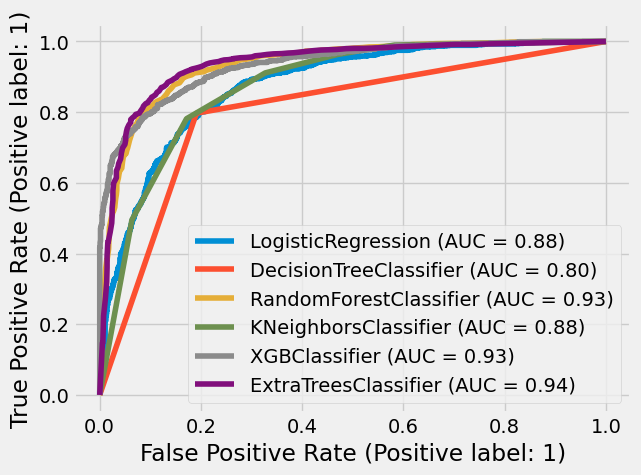

<Figure size 2000x2000 with 0 Axes>

In [64]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(ext, x_test, y_test, ax = disp.ax_)
plt.figure(figsize = (20,20))
plt.show()

* We can see KNeighborsClassifier is giving least difference in accuracy and cv score but its AUC is very less
* RandomForestClassifier is giving least in accuracy and cv score next to KNeighborsClassifier, and its AUC also High, that is it is showing better model performance than KNeighborsClassifier.
* ExtraTreesClassifier and XGBClassifier are showing almost same AUC as RandomForestClassifier, but their the difference in accuracy and cv score is higher than RandomForestClassifier.
* Considering above observations I am selecting RandomForestClassifier as a best suitable algorithm for this model.

## Hyperparameter Tuning

In [65]:
#lets selects different parameters for tuning
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[700,900,1000,1200]
                }

In [66]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20, 22],
                         'n_estimators': [700, 900, 1000, 1200]})

In [67]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 1200}

In [68]:
#lets check the results of final model with best parameters
model = RandomForestClassifier(criterion = 'entropy', max_depth = 15,   n_estimators = 1200)
model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("------------------------------------------------------------------------")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score: 86.31619636644761%
--------------------------------------------------------
roc_auc_score: 86.33359753159918%
--------------------------------------------------------
Confusion Matrix : 
 [[1104  202]
 [ 152 1129]]

------------------------------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1306
           1       0.85      0.88      0.86      1281

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



##### Great we have got improved accuracy after hyperparameter tuning.

## AUC ROC CURVE for final model

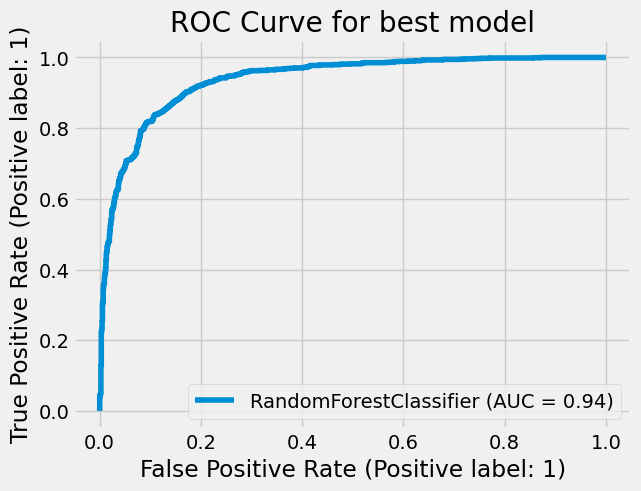

In [69]:
plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve for best model')
plt.show()

##### Great after hyperparameter tuning we got improvement in roc curve and AUC also.

## Model saving

In [70]:
import joblib
joblib.dump(model,"Customer_churn.pkl")

['Customer_churn.pkl']

finally I am saving our best model in .pkl file